In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


C:\Users\User\AppData\Local\Temp\ipykernel_16116\239418225.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



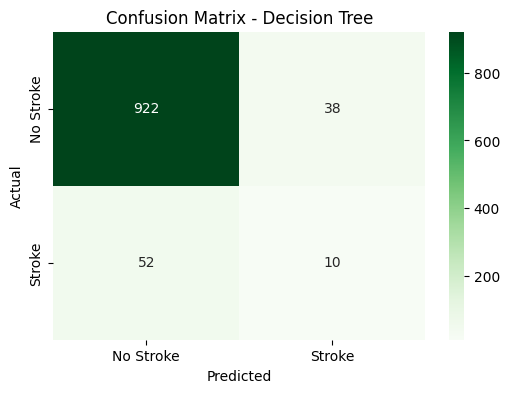

In [21]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


X = df.drop('stroke', axis=1)
y = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.13      0.28      0.18        50

    accuracy                           0.87      1022
   macro avg       0.55      0.59      0.55      1022
weighted avg       0.92      0.87      0.89      1022

age: 0.5384
avg_glucose_level: 0.2429
work_type: 0.0550
smoking_status: 0.0531
ever_married: 0.0305
Residence_type: 0.0215
hypertension: 0.0198
heart_disease: 0.0195
gender: 0.0193


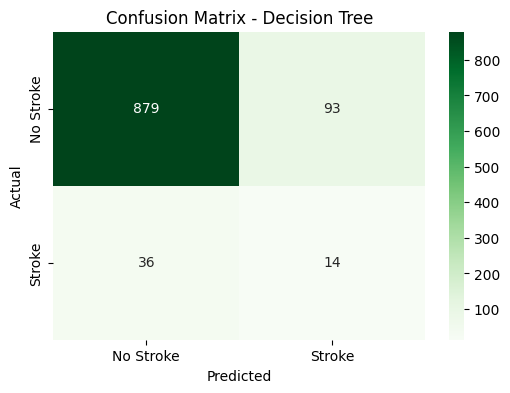

In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.dropna(axis=1,inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Interaction: age * bmi
#df['age_bmi'] = df['age'] * df['bmi']

# Interaction: hypertension * heart_disease
#df['ht_hd'] = df['hypertension'] * df['heart_disease']

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

importances = dt.feature_importances_
feature_names = X.columns

for name, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")

cm_dt = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()